# Проектная работа №2. Визуализация.

### 1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

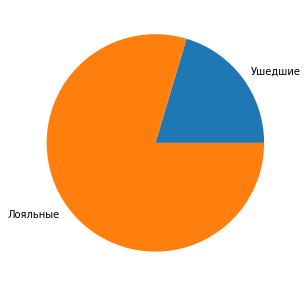

In [422]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')
churn_data=churn_data.drop(columns='RowNumber',axis=1)

ds=pd.Series([churn_data['Exited'].sum(),churn_data.shape[0]-churn_data['Exited'].sum()],index=['Ушедшие','Лояльные'])
ds.plot(kind='pie',label='Клиенты',figsize=(5, 5)).yaxis.label.set_visible(False)




### Судя по графику, ушедших клиентов чуть меньше четверти лояльных банку клиентов.

---

### 2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Text(0, 0.5, 'Число клиентов')

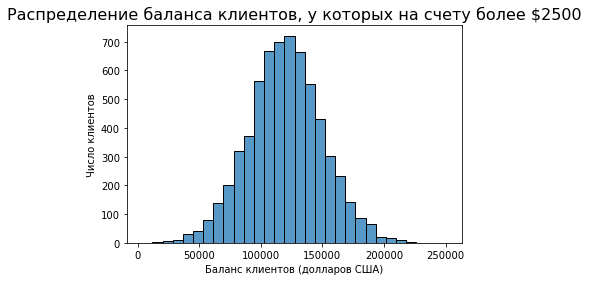

In [423]:
churn_data_2500=churn_data[(churn_data['Balance']>2500)]
histplot1 = sns.histplot(data=churn_data_2500, x='Balance', bins=30)
histplot1.set_title('Распределение баланса клиентов, у которых на счету более $2500', fontsize=16)
histplot1.set_xlabel('Баланс клиентов (долларов США)')
histplot1.set_ylabel('Число клиентов')

### Из графика ясно видно, что наибольшее количество клиентов, у которых баланс больше 2500 долларов, имеют на счету средства в размере от 100тыс до 150тыс. долларов

---

### 3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Text(0, 0.5, 'Число клиентов ')

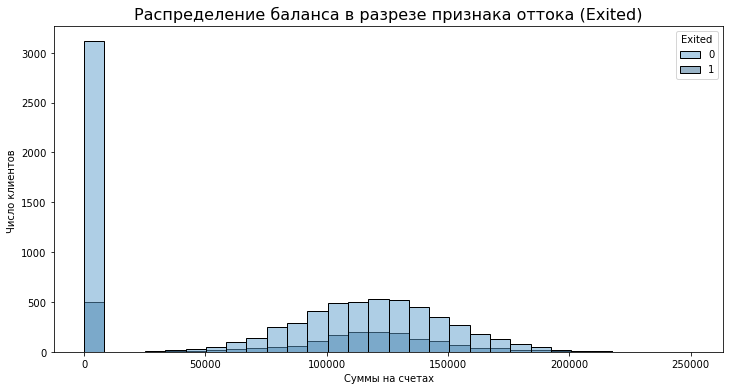

In [424]:
fig = plt.figure(figsize=(12, 6))
grf = sns.histplot(data=churn_data, x='Balance',hue='Exited',bins=30,palette="Blues_d")
grf.set_title('Распределение баланса в разрезе признака оттока (Exited)', fontsize=16)
grf.set_xlabel('Суммы на счетах')
grf.set_ylabel('Число клиентов ')



### Из графика видно, что клиенты уходят из банка даже при наличии существенных сумм на их счету. Это может говорить о том, что их что-то, возможно какая-то услуга или санкция, гонит в другие банки к конкурентам так, что они, возможно в спешке, оставляют деньги на балансе.
---

### 4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

Text(0.5, 1.0, 'Распределение возраста в группах лояльных клиентов и ушедших')

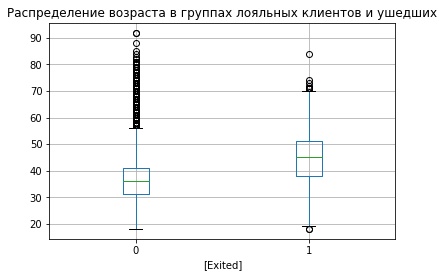

In [425]:
boxplot = churn_data.boxplot(column=['Age'],by=['Exited'])
boxplot.get_figure().suptitle("")
boxplot.set_title('Распределение возраста в группах лояльных клиентов и ушедших')

### Из графиков мы видим, что основная группа ушедших клиентов в возрасте 40-50 лет. Именно этой возрастной группе следует уделить внимание банку. Также имеет смысл проанализировать клиентов, чей возраст меньше 20 лет и (особенно) больше 70 лет, на предмет коллизий, т.к. они попадают в зону "выбросов".
---
### 5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Text(0, 0.5, 'Кредитный рейтинг')

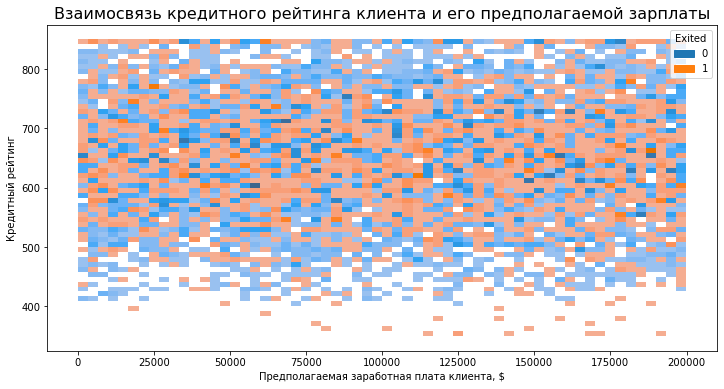

In [426]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
histplot1 = sns.histplot(data=churn_data, x='EstimatedSalary', y='CreditScore', hue='Exited', bins=60)
histplot1.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
histplot1.set_xlabel('Предполагаемая заработная плата клиента, $')
histplot1.set_ylabel('Кредитный рейтинг')

### Из графика можно сделать следующие выводы:
	1) Какой бы высокой ни была зарплата, клиентов с рейтингом 400 и ниже нет или они уже ушли из банка;
	2) Наибольшее количество клиентов, как лояльных, так и ушедших, имеют средний кредитный рейтинг от 600 до 800;
	3) Наибольшее количество ушедших клиентов с высоким рейтингом имело небольшую зарплату.
---
### 6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это

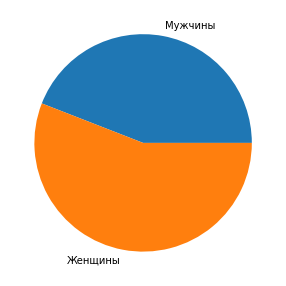

In [427]:
churn_data_e=churn_data[(churn_data['Exited']==1)]
males=churn_data_e[(churn_data_e['Gender']=='Male')].shape[0]
females=churn_data_e.shape[0]-males
ds=pd.Series([males,females],index=['Мужчины','Женщины'])
ds.plot(kind='pie',label='Клиенты',figsize=(5, 5)).yaxis.label.set_visible(False)

### Чаще уходят женщины
---
### 7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Text(0, 0.5, 'Услуги банка')

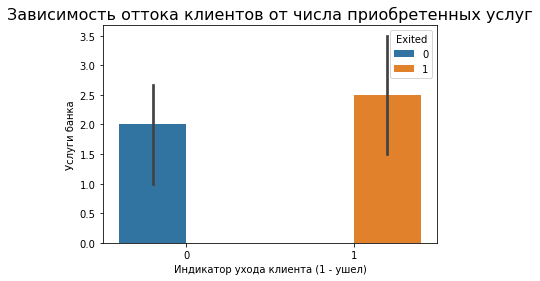

In [428]:
churn_data_7=churn_data.groupby(['NumOfProducts','Exited'],as_index=False).count()
histplot2=sns.barplot(data = churn_data_7, x = 'Exited', y = 'NumOfProducts', hue = 'Exited')
histplot2.set_title('Зависимость оттока клиентов от числа приобретенных услуг', fontsize=16)
histplot2.set_xlabel('Индикатор ухода клиента (1 - ушел)')
histplot2.set_ylabel('Услуги банка')

### Из графика вытекает, что уход клиентов обусловлен большим числом приобретенных услуг банка
---
### 8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

<AxesSubplot:ylabel='Среди ушедших клиентов'>

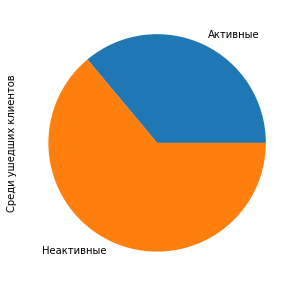

In [429]:
active=churn_data_e['IsActiveMember'].sum()
noact=churn_data_e.shape[0]-active
ds=pd.Series([active,noact],index=['Активные','Неактивные'])
ds.plot(kind='pie',label='Среди ушедших клиентов',figsize=(5, 5))

### Среди ушедших клиентов неактивных больше, чем активных. Банку следует тем или иным способом активировать клиентов, это уменьшит отток.
---
### 9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [430]:
import plotly.express as px

churn_data_9=churn_data_e.groupby(['Geography'],as_index=False).sum()
print(churn_data_9.head())
fig = px.choropleth(
    data_frame=churn_data_9, 
    locations="Geography", 
    locationmode = "country names", 
    color="Exited", 
    range_color=[0, 1e3], 
    title='Ушедшие клиенты на карте мира', 
    width=667, 
    height=500, 
    color_continuous_scale='Reds' 
)

fig.show()


  Geography   CustomerId  CreditScore    Age  Tenure      Balance  \
0    France  12711018670       519951  36558    4050  57666164.54   
1   Germany  12770604953       527219  36544    4075  97973915.53   
2     Spain   6479012229       267411  18233    1923  29948014.56   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0           1196        569             298      83785815.42     810  
1           1184        577             296      80100763.57     814  
2            625        278             141      42799006.14     413  


### Можно предположить, что большое число ушедших клиентов во Франции и Германии связано с удаленностью от океана, однако, скорее всего, причина в навязываемых банком количестве услуг, что уже высчитывалось ранее
---
### 10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

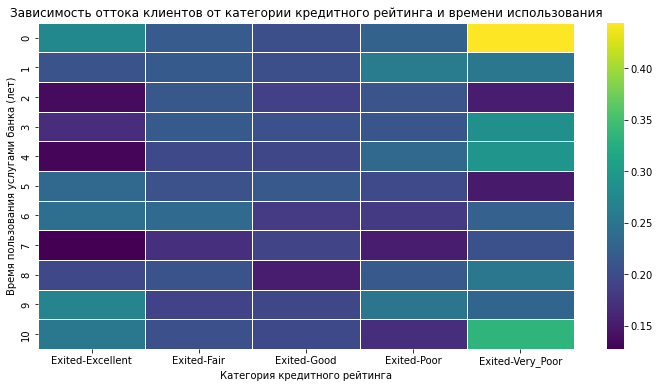

In [431]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)
pivot=pd.pivot_table(churn_data,index=['Tenure'],columns=['CreditScoreCat'],values=['Exited'])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
jb_heatmap = sns.heatmap(
    pivot,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
)
jb_heatmap.set_title('Зависимость оттока клиентов от категории кредитного рейтинга и времени использования');
jb_heatmap.set_xlabel('Категория кредитного рейтинга');
jb_heatmap.set_ylabel('Время пользования услугами банка (лет)');

### Как и следовало ожидать и что видно по графику, наиболее сильный отток наблюдается у клиентов, которые только стали пользователями услуг банка и кредитный рейтинг которых Very_Poor, то есть фактически без рейтинга. Также наблюдается почти нулевой отток клиентов, имеющих отличный рейтинг и пользующихся услугами банка от 2 до 4 и 7 лет.